<a href="https://colab.research.google.com/github/Charan-tec/Car-price-prediction-/blob/main/Car_price_prediction_using_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/car data.csv')
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.describe(include='number')

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [ ]:
if 'Fuel_Type' in data.columns:
    data['Fuel_Type'] = data['Fuel_Type'].fillna(0)

In [ ]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Owner,0
Seller_Type_Individual,0
Transmission_Manual,0


In [ ]:
data.shape

(301, 9)

In [ ]:
Car_Unique_Names = set(data['Car_Name'])
Car_Name_Count = len(Car_Unique_Names)

print("Car_Name_Count =", Car_Name_Count)
print("Car_Unique_Names =", Car_Unique_Names)

Car_Name_Count = 98
Car_Unique_Names = {'grand i10', 'Hero  Ignitor Disc', 'brio', 'Activa 4g', 'land cruiser', 'corolla altis', 'etios liva', 'Yamaha Fazer ', 'Suzuki Access 125', 'Royal Enfield Thunder 500', '800', 'Royal Enfield Thunder 350', 'Bajaj Pulsar 220 F', 'Honda CB Trigger', 'Hero Passion X pro', 'swift', 'Bajaj Pulsar RS200', 'Bajaj Avenger 150', 'TVS Wego', 'ertiga', 'etios g', 'ritz', 'Hero Passion Pro', 'KTM 390 Duke ', 'creta', 'Yamaha FZ S V 2.0', 'Honda Activa 125', 'xcent', 'TVS Apache RTR 180', 'Honda CB Unicorn', 'Hero Honda Passion Pro', 'Hero  CBZ Xtreme', 'Hero Super Splendor', 'Honda CB Shine', 'eon', 'baleno', 'Royal Enfield Bullet 350', 'TVS Sport ', 'Hero Hunk', 'Bajaj Dominar 400', 'KTM RC390', 's cross', 'Royal Enfield Classic 350', 'TVS Apache RTR 160', 'Hero Glamour', 'Yamaha FZ S ', 'Yamaha FZ  v 2.0', 'fortuner', 'sx4', 'Honda Dream Yuga ', 'alto k10', 'Bajaj Pulsar NS 200', 'etios cross', 'city', 'Activa 3g', 'Hero Splender iSmart', 'Bajaj Avenger 15

In [ ]:
fuel_type=data['Fuel_Type'].unique()
print(fuel_type)

['Petrol' 'Diesel' 'CNG']


In [ ]:
print(data['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [ ]:
seller_type=data['Seller_Type'].unique()
print(seller_type)

['Dealer' 'Individual']


In [ ]:
print(data ['Seller_Type'].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [ ]:
transmission_type=data['Transmission'].unique()
print(transmission_type)

['Manual' 'Automatic']


In [ ]:
print(data['Transmission'].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
owner_type=data['Owner'].unique()
print(owner_type)

[0 1 3]


In [ ]:
print(data['Owner'].value_counts())

Owner
0    290
1     10
3      1
Name: count, dtype: int64


visualization chart analysis


Text(0, 0.5, 'Selling_Price')

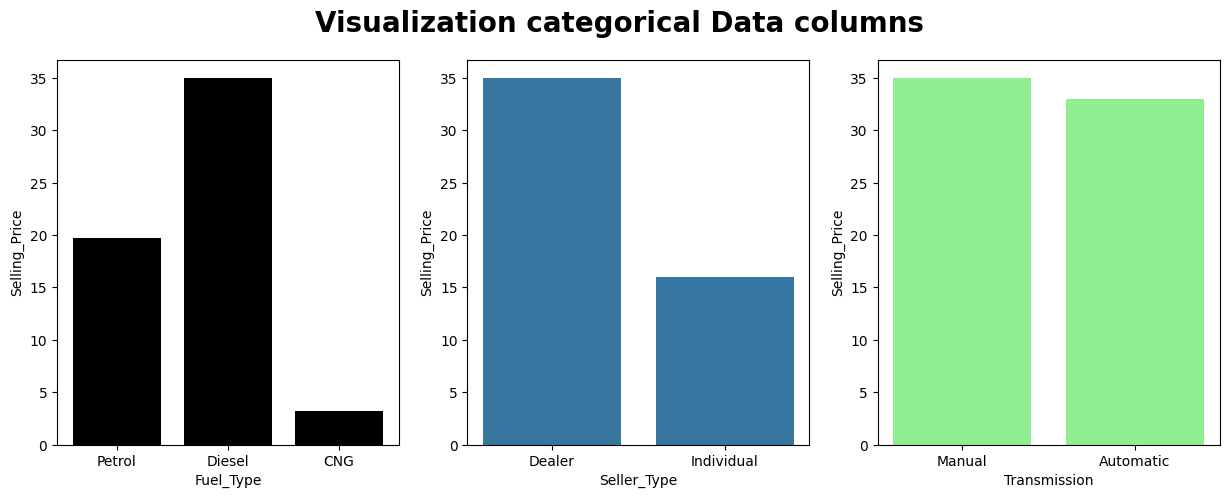

In [ ]:
fuel_type=data['Fuel_Type']
seller_type=data['Seller_Type']
transmission=data['Transmission']
Owner=data['Owner']
selling_price=data['Selling_Price']
plt.figure(figsize=(15,5))
fig=plt.suptitle("Visualization categorical Data columns",fontsize=20,fontweight='bold')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color='black') #plot 1: Fuel_Type#
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color='#3776A1') #plot 2 : Seller_Type#
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')
plt.subplot(1,3,3)
plt.bar(transmission,selling_price,color='lightgreen') #Plot 3: Transmission#
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')

/tmp/ipython-input-1289304125.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_type_agg['Fuel_Type'],y=fuel_type_agg['Selling_Price'],palette=["black","#3776A1","lightgreen"], ax=axes[0])
/tmp/ipython-input-1289304125.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_type_agg['Seller_Type'],y=seller_type_agg['Selling_Price'],palette=["#5293BB","#45f248"],ax=axes[1])
/tmp/ipython-input-1289304125.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transmission_type_agg['Transmission'],y=transmission_type_agg['Selling_P

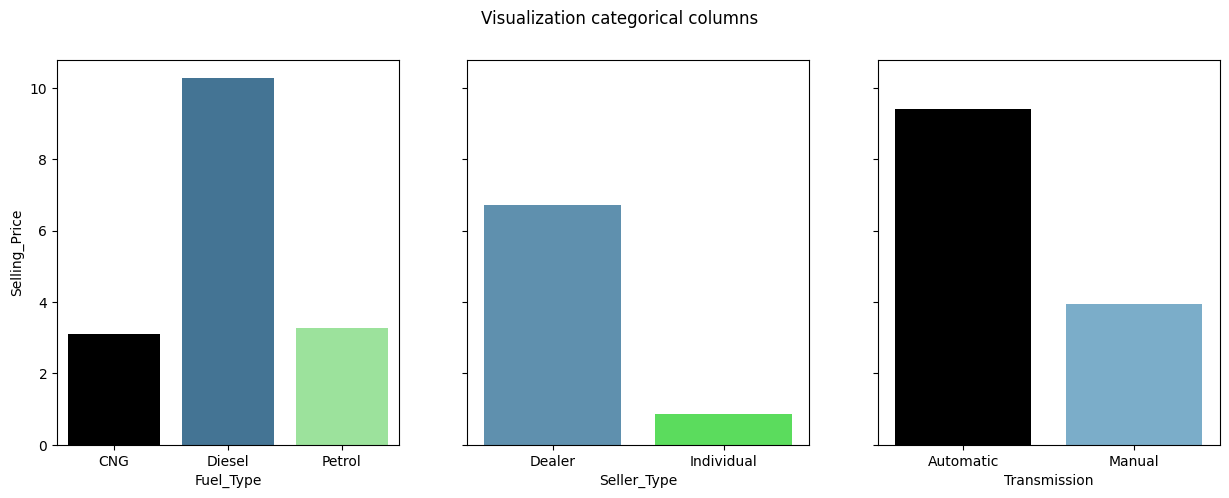

In [ ]:
fig, axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle("Visualization categorical columns")

fuel_type_agg = data.groupby('Fuel_Type')['Selling_Price'].mean().reset_index()
seller_type_agg = data.groupby('Seller_Type')['Selling_Price'].mean().reset_index()
transmission_type_agg = data.groupby('Transmission')['Selling_Price'].mean().reset_index()

sns.barplot(x=fuel_type_agg['Fuel_Type'],y=fuel_type_agg['Selling_Price'],palette=["black","#3776A1","lightgreen"], ax=axes[0])
sns.barplot(x=seller_type_agg['Seller_Type'],y=seller_type_agg['Selling_Price'],palette=["#5293BB","#45f248"],ax=axes[1])
sns.barplot(x=transmission_type_agg['Transmission'],y=transmission_type_agg['Selling_Price'],palette=["black","#6Eb1D6"],ax=axes[2])

plt.show()

In [ ]:
seller_type=data.groupby('Seller_Type').get_group('Dealer')
seller_type.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


column conversion using one- hot encoding technique


In [ ]:
data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':1,'Diesel':0,'CNG' :2})
#one -hot endcoding
if 'Seller_Type' in data.columns and 'Transmission' in data.columns:
    data=pd.get_dummies(data=data,columns=['Seller_Type','Transmission'],drop_first=True)

In [ ]:
display(data)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,NaN,0,False,True
1,sx4,2013,4.75,9.54,43000,NaN,0,False,True
2,ciaz,2017,7.25,9.85,6900,NaN,0,False,True
3,wagon r,2011,2.85,4.15,5200,NaN,0,False,True
4,swift,2014,4.60,6.87,42450,NaN,0,False,True
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,NaN,0,False,True
297,brio,2015,4.00,5.90,60000,NaN,0,False,True
298,city,2009,3.35,11.00,87934,NaN,0,False,True
299,city,2017,11.50,12.50,9000,NaN,0,False,True


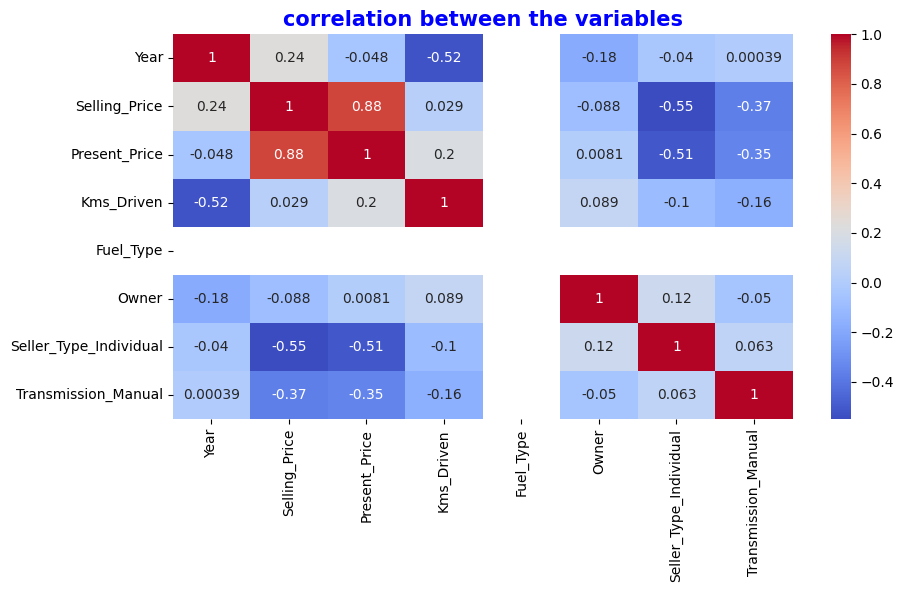

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.drop('Car_Name', axis=1).corr(),annot=True,cmap='coolwarm')
plt.title('correlation between the variables',fontsize=15,fontweight='bold',color='blue')
plt.show()

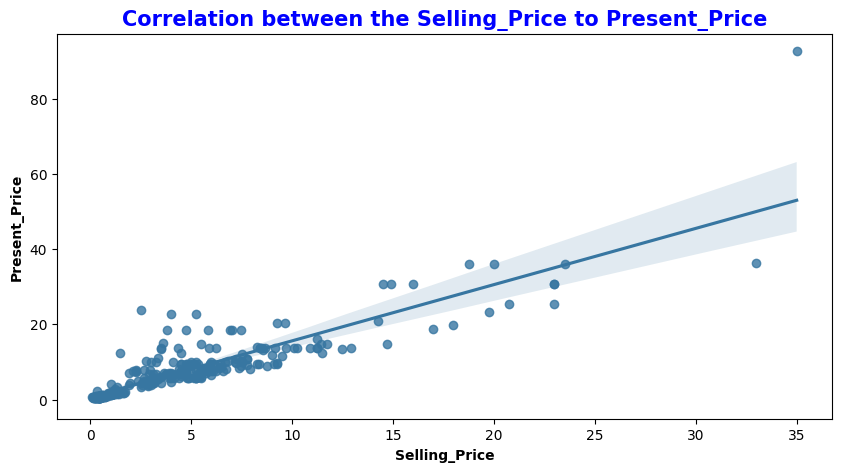

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.regplot(x=data['Selling_Price'],y=data['Present_Price'],data=data,color='#3776A1')
plt.title('Correlation between the Selling_Price to Present_Price',fontdict={'fontsize':15,'fontweight':'bold','color':'blue'})
plt.xlabel('Selling_Price',fontsize=10,fontweight='bold',color='black')
plt.ylabel('Present_Price',fontsize=10,fontweight='bold',color='black')
plt.show()

car price prediction using linear regression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load Dataset
df = pd.read_csv("/car data.csv")

# Drop unnecessary column
df = df.drop(["Car_Name"], axis=1)

# Convert categorical variables into numeric (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


print("\n🚗 Welcome to Car Price Prediction App!")
print("Enter car details below:\n")

year = int(input("Year of Manufacture: "))
present_price = float(input("Present Price (in Lakhs): "))
kms_driven = int(input("Kilometers Driven: "))
owner = int(input("Number of Previous Owners: "))
fuel_type = input("Fuel Type (Petrol/Diesel/CNG): ").strip().capitalize()
seller_type = input("Seller Type (Dealer/Individual): ").strip().capitalize()
transmission = input("Transmission (Manual/Automatic): ").strip().capitalize()

# Prepare input dictionary
input_dict = {
    "Year": [year],
    "Present_Price": [present_price],
    "Kms_Driven": [kms_driven],
    "Owner": [owner],
    "Fuel_Type_Diesel": [1 if fuel_type == "Diesel" else 0],
    "Fuel_Type_Petrol": [1 if fuel_type == "Petrol" else 0],
    "Seller_Type_Individual": [1 if seller_type == "Individual" else 0],
    "Transmission_Manual": [1 if transmission == "Manual" else 0],
}

# Convert to DataFrame
input_df = pd.DataFrame(input_dict)

# Predict Price
predicted_price = model.predict(input_df)
print(f"\n💰 Predicted Selling Price: ₹{predicted_price[0]:.2f} Lakhs")

✅ Model trained successfully!

🚗 Welcome to Car Price Prediction App!
Enter car details below:

Year of Manufacture: 2015
Present Price (in Lakhs): 6.5
Kilometers Driven: 3000
Number of Previous Owners: 1
Fuel Type (Petrol/Diesel/CNG): petrol
Seller Type (Dealer/Individual): dealer
Transmission (Manual/Automatic): manual

💰 Predicted Selling Price: ₹3.92 Lakhs
